<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   overall                     18278 non-null  int64
 1   attacking_crossing          18278 non-null  int64
 2   attacking_finishing         18278 non-null  int64
 3   attacking_heading_accuracy  18278 non-null  int64
 4   attacking_short_passing     18278 non-null  int64
 5   attacking_volleys           18278 non-null  int64
 6   skill_dribbling             18278 non-null  int64
 7   skill_curve                 18278 non-null  int64
 8   skill_fk_accuracy           18278 non-null  int64
 9   skill_long_passing          18278 non-null  int64
 10  skill_ball_control          18278 non-null  int64
 11  movement_acceleration       18278 non-null  int64
 12  movement_sprint_speed       18278 non-null  int64
 13  movement_agility            18278 non-null  int64
 14  moveme

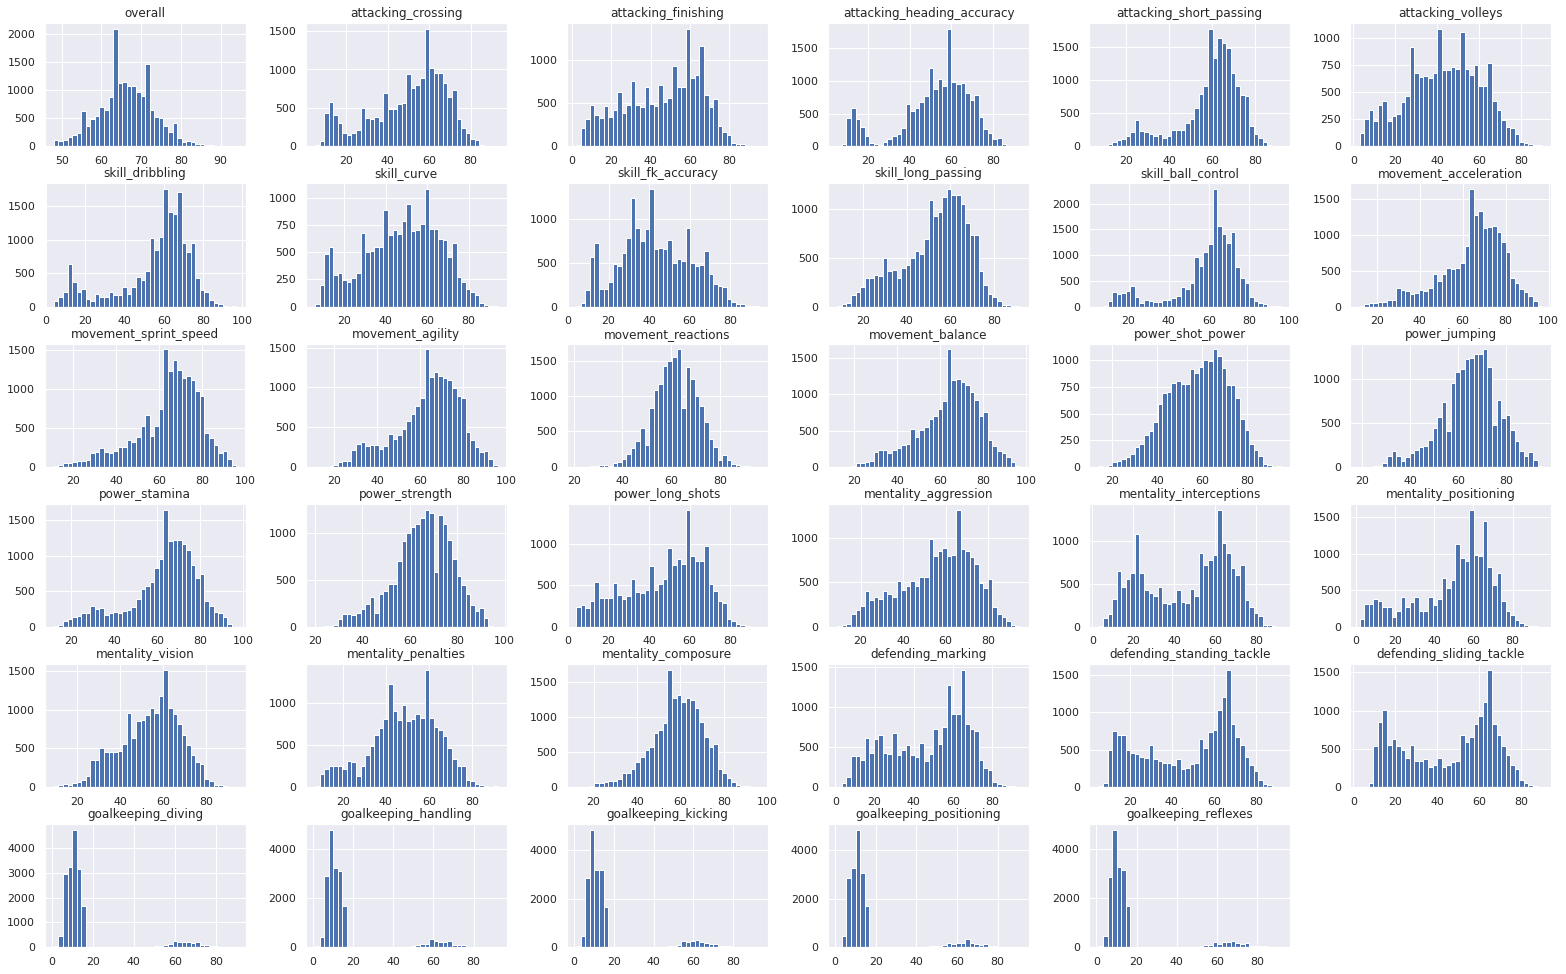

Length of training data: 14622
Length of testing data: 3656
Length of total data: 18278


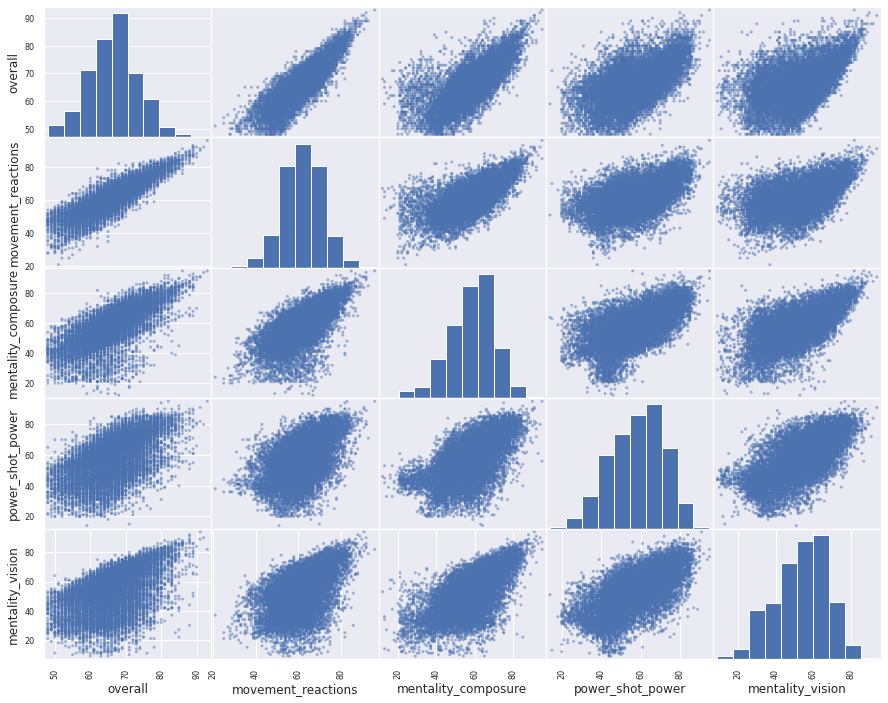

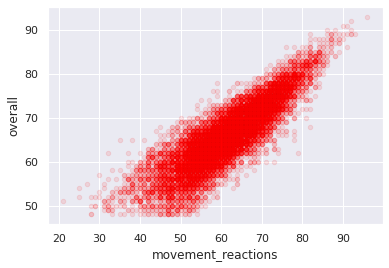

Scores: [2.48985397 2.509888   2.50910312 2.4642167  2.46189444 2.51445854
 2.48370267 2.4734443  2.48382446 2.59475861]
Mean: 2.4985144826450054
Standard Deviation: 0.03662607159427437
Scores: [2.0311989  2.04143678 2.1054616  2.13882103 2.16109108 2.11728603
 2.08391009 2.02987267 2.25419506 2.13722143]
Mean: 2.1100494654827413
Standard Deviation: 0.06561968573241815
Scores: [1.3038728  1.25518991 1.26249891 1.27073874 1.22516522 1.30859787
 1.2666806  1.24793079 1.30370164 1.30516303]
Mean: 1.274953951826579
Standard Deviation: 0.027474282172745577


NameError: ignored

In [18]:
#Shawn Matyanga 
#HAI
#R204651S

import numpy as np
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import missingno as msno
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')
import plotly.express as px
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/jpzambranoleon/ML_Projects/master/"
TRAIN_PATH = os.path.join("datasets", "players_20")
TRAIN_URL = DOWNLOAD_ROOT + "datasets/players_20.csv"
def fetch_train_data(train_url=TRAIN_URL, train_path=TRAIN_PATH):
  os.makedirs(train_path, exist_ok=True)
  csv_path = os.path.join(train_path, "players_20.csv")
  urllib.request.urlretrieve(train_url, csv_path)

fetch_train_data()

import pandas as pd
def load_train_data(train_path=TRAIN_PATH):
  csv_path = os.path.join(train_path, "players_20.csv")
  return pd.read_csv(csv_path)

player_data = load_train_data()
player_data.head()

player_data.shape
(18278, 104)

#player stat features
columns = ['overall','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
player_df = player_data[columns]
player_df.head()

player_df.info()
player_df.describe()

player_df.shape
(18278, 35)

player_df.hist(bins=40, figsize=(27,17))
plt.show()

player_df.isna().any()

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(player_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(player_df))

fifa_df = train_set.copy()
corr_matrix = fifa_df.corr()
corr_matrix['overall'].sort_values(ascending=False)

from pandas.plotting import scatter_matrix
attributes = ["overall", "movement_reactions", "mentality_composure", "power_shot_power", "mentality_vision"]
scatter_matrix(fifa_df[attributes], figsize=(15,12))
plt.show()

fifa_df.plot(kind="scatter", x="movement_reactions", y="overall", alpha=0.1, color="red")
plt.show()

y_train = train_set['overall']
X_train = train_set.drop('overall', axis=1)
y_test = test_set['overall']
X_test = test_set.drop('overall', axis=1)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
y_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
2.493574884183225

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, y_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
0.0

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

y_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
0.4774070457668509

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())
display_scores(lin_reg_scores)


scores = cross_val_score(tree_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
tree_scores = np.sqrt(-scores)
display_scores(tree_scores)


scores = cross_val_score(forest_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-scores)
display_scores(forest_scores)


from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_
{'max_features': 8, 'n_estimators': 30}

grid_search.best_estimator_

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))


some_data = X_test.iloc[:5]
some_label = y_test.iloc[:5]
print("Predictions:", final_model.predict(some_data))
print("Labels:", list(some_label))



